In [1]:
%%capture
# Redirects the current working directory to the project directory
%cd ..

In [2]:
%load_ext tensorboard

In [3]:
from src.model import RBN
from tensorflow.keras.callbacks import TensorBoard
from datetime import datetime
import numpy as np

In [4]:
X_dataset = np.load('raw/X_dataset.npy')
y_dataset = np.load('raw/y_dataset.npy')

In [5]:
l = int(len(X_dataset) * 0.7)
X_dataset , X_val = X_dataset[:l], X_dataset[l:]
y_dataset , y_val = y_dataset[:l], y_dataset[l:]

In [6]:
print(X_dataset.shape)
print(y_dataset.shape)
print(X_val.shape)
print(y_val.shape)

(172, 84, 56)
(172, 28, 1)
(74, 84, 56)
(74, 28, 1)


In [7]:
RBN_model = RBN(t=84, k=56, H=28, units=100)

In [8]:
RBN_model.compile(optimizer="Adam", loss="mse", metrics=["mae"])

In [9]:
log_directory = 'logs/fit/' + datetime.now().strftime('%Y-%m-%dT%H%M')
tb_callback = TensorBoard(log_dir=log_directory, histogram_freq=1)

In [10]:
RBN_model.fit(X_dataset, y_dataset,
              batch_size=1, epochs=10,
              callbacks = [tb_callback],
              validation_data = (X_val, y_val))

Epoch 1/10
172/172 [==============================] - 6s 19ms/step - loss: 36133904.0000 - mae: 4647.5234 - val_loss: 112592464.0000 - val_mae: 10130.3398
Epoch 2/10
172/172 [==============================] - 3s 15ms/step - loss: 36095360.0000 - mae: 4643.2920 - val_loss: 112509464.0000 - val_mae: 10126.2451
Epoch 3/10
172/172 [==============================] - 3s 15ms/step - loss: 36057204.0000 - mae: 4639.1709 - val_loss: 112424416.0000 - val_mae: 10122.0449
Epoch 4/10
172/172 [==============================] - 2s 14ms/step - loss: 36018792.0000 - mae: 4635.1978 - val_loss: 112340440.0000 - val_mae: 10117.8945
Epoch 5/10
172/172 [==============================] - 3s 15ms/step - loss: 35980328.0000 - mae: 4630.9966 - val_loss: 112257280.0000 - val_mae: 10113.7861
Epoch 6/10
172/172 [==============================] - 3s 15ms/step - loss: 35942036.0000 - mae: 4626.8867 - val_loss: 112172184.0000 - val_mae: 10109.5801
Epoch 7/10
172/172 [==============================] - 3s 15ms/step - l

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

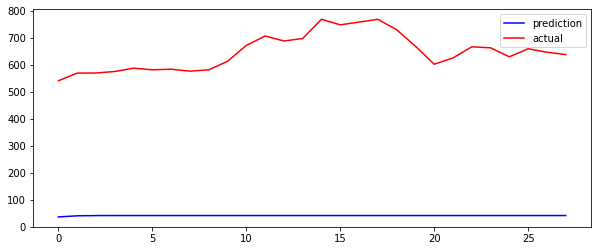

In [12]:
fig, ax = plt.subplots(figsize=(10,4))
test_points = RBN_model(X_dataset[10], training=False)
ax.plot(test_points.numpy().reshape(-1), color='b', label='prediction')
ax.plot(y_dataset[10], color='r', label='actual')

ax.legend()